# Final Project, Part 1: Proposal and Dataset
*Frame your problem and data source(s)*

Describe your chosen problem and state whether you have access to relevant data.

## Requirements
1. Draft a well-formed one sentence problem statement relevant to a business problem affecting your team, division, or organization.
1. Include the following elements:
   * Hypothesis/assumptions
   * Goals and success metrics
   * Risks or limitations
1. Identify at least one relevant dataset and confirm that you have access and can share the data.

## Problem Statement

This project will explore the effectiveness of recycling in the state of Massachusetts.
Factors of interest:
* effect of recycling municipal waste handling program (service type, collection fequency, etc)
* effect of trash municipal waste handling program (pay-to-throw, 
* effect of municipality (education level, types of homes, 
* effect of funding for solid waste handling
### Hypotheses

1. 

## Types of DS problems:
[source](http://jtleek.com/modules/01_DataScientistToolbox/03_01_typesOfQuestions/#1)

* **Descriptive**: describe set of data
   * The first kind of data analysis performed
   * Commonly applied to census data
   * The description and interpretation are different steps
   * Descriptions can usually not be generalized without additional statistical modeling
* **Exploratory**: find relationships you didn't know about
   * Exploratory models are good for discovering new connections
   * They are also useful for defining future studies
   * Exploratory analyses are usually not the final say
   * Exploratory analyses alone should not be used for generalizing/predicting
   * Correlation does not imply causation
* **Inferential**: use a relatively small sample of data to say something about the population
   * Inference is commonly the goal of statistical models
   * Inference involves estimating both the *quantity* you care about and your *uncertainty* about your estimate
   * Inference depends heavily on both the population and the sampling scheme
* **Predictive**: use the data on some objects to predict values of another object
   * If X predicts Y it does not mean that X causes Y
   * Accurate prediction depends heavily on measuring the right variables
   * Although there are better and worse prediction models, more data and a simple model works really well
   * Prediction is very hard, especially about the future references
* **Causal**: to find out what happens to one variable when another changes
   * Usually randomized studies are required to identify causation
   * There are approaches to inferring causation in non-randomized studies, but they are complicated and sensitive to assumptions
   * Causal relationships are usually identified as average effects, but may not apply to every individual
   * Causal models are usually the "gold standard" for data analysis
* **Mechanistic**: Understand the exact changes in variables that lead to changes in other variables for individual objects.
   * Incredibly hard to infer, except in simple situations
   * Usually modeled by a deterministic set of equations (physical/engineering science)
   * Generally the random component of the data is measurement error
   * If the equations are known but the parameters are not, they may be inferred with data analysis

## Descriptive Analysis

Data I've collected:
* [EPA historic national statistics on end-of-life (EOL)](https://edg.epa.gov/metadata/catalog/search/resource/details.page?uuid=C9310A59-16D2-4002-B36B-2B0A1C637D4E) for various types of municipal solid waste (MSW)
  * figures available [here](https://www.epa.gov/facts-and-figures-about-materials-waste-and-recycling/national-overview-facts-and-figures-materials)
* [MA municipal survey data](https://www.mass.gov/lists/recycling-solid-waste-data-for-massachusetts-cities-towns) for years 2009 through 2019
  * Program and services description
  * Trash Disposal & Recycling Tonnage collected through municipal program, including materials collected from residents, municipal buildings, schools, and businesses
* [MA Combustor Overall Waste Composition](https://www.mass.gov/guides/solid-waste-master-plan#-waste-characterization-&-capacity-studies-) By Primary Material Category for 2010, 2013, 2016, and 2019
* [MA Combustor and Disposal Rate](https://www.mass.gov/guides/solid-waste-master-plan) updates per year
  * NOT per material
  * per county
  * export and import processing
* [MA MSW Capacity](https://www.mass.gov/guides/solid-waste-master-plan#-waste-characterization-&-capacity-studies-) data
* [MA participation Survey Results](https://www.mass.gov/lists/recycling-solid-waste-data-for-massachusetts-cities-towns)
* Cambridge Residue Rates from recent 3-year audit (raw data not for public distribution)

In [14]:
import pandas as pd

## Cleaning a single municipality survey

In [135]:
muServ19 = pd.read_csv('data/MA_MSW_Collection_Data/mudata19.csv', skiprows=3, usecols=[i for i in range(61)], index_col='Municipality Name')

In [136]:
muServ19.drop(columns=['Food Waste Service Type', ' # of weeks collected curbside',
       'Weeks the drop-off center open to residents','Swap-Shop',
       'Reuse area at transfer station/ recycling center?',
       'Compost Bin Distribution Program'], inplace=True)

In [137]:
muServ19.head(5)

,Contact Name,Total Number of Households,Households Served by Municipal Trash Program,Households Served by Municipal Recycling Program,Trash Service Type,Carts for Trash,Trash Cart size,Recycling Service Type,Recycling Collection Frequency,SS Recycling,...,Does trash disposal tonnage include bulky waste?,Bulky waste tonnage,Fee for bulky waste?,Annual Bulky \nWaste \nLimit,Tip Fee as of 1/1/2020,Tons Single Stream Recyclables,Newspaper,Cardboard,Mixed Paper,Commingled
Municipality Name,,,,,,,,,,,,,,,,,,,,,
Abington,Angela Dahlstrom,6558.0,4486.0,4486.0,Curbside,Yes,64.0,Curbside,Weekly,Yes,...,Yes,NaN,Yes,NaN,86.50,1413.42,NaN,NaN,NaN,NaN
Acton,Corey York,9800.0,3846.0,4335.0,Drop-off,NaN,NaN,Drop-off,NaN,NaN,...,Yes,NaN,Yes,NaN,57.16,NaN,NaN,NaN,683.04,407.27
Acushnet,Dan Menard,4304.0,3591.0,3591.0,Curbside,Yes,65.0,Both,Bi-weekly,Yes,...,No,41.00,Yes,NaN,64.60,879.50,3.7,20.0,16.94,27.40
Adams,Linda Cernik,3867.0,664.0,664.0,Drop-off,NaN,NaN,Drop-off,NaN,NaN,...,No,4.43,Yes,NaN,110.00,NaN,NaN,NaN,94.13,45.48
Agawam,Tracy DeMaio,12031.0,8879.0,8879.0,Curbside,Yes,65.0,Curbside,Bi-weekly,Yes,...,No,275.17,Yes,30.0,74.00,2238.00,NaN,NaN,NaN,NaN


In [138]:
muServ19.shape

(352, 54)

In [139]:
muServ19 = muServ19[muServ19['Contact Name'] != '- - DID NOT REPORT - -']

In [140]:
muServ19.shape

(286, 54)

In [141]:
muServ19[muServ19.loc[:,'Households Served by Municipal Trash Program':'Households Served by Municipal Recycling Program'].sum(axis=1) == 0]

,Contact Name,Total Number of Households,Households Served by Municipal Trash Program,Households Served by Municipal Recycling Program,Trash Service Type,Carts for Trash,Trash Cart size,Recycling Service Type,Recycling Collection Frequency,SS Recycling,...,Does trash disposal tonnage include bulky waste?,Bulky waste tonnage,Fee for bulky waste?,Annual Bulky \nWaste \nLimit,Tip Fee as of 1/1/2020,Tons Single Stream Recyclables,Newspaper,Cardboard,Mixed Paper,Commingled
Municipality Name,,,,,,,,,,,,,,,,,,,,,
Charlton,Kara Hmielowski,4380.0,0.0,0.0,None,NaN,NaN,None,NaN,NaN,...,No,0.00,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
Clarksburg,Linda Cernik,720.0,0.0,0.0,None,NaN,NaN,None,NaN,NaN,...,No,1.53,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hawley,Jan Ameen,166.0,0.0,0.0,None,NaN,NaN,None,NaN,NaN,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hull,Joyce Sullivan,10417.0,0.0,0.0,None,NaN,NaN,None,NaN,NaN,...,Yes,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
Lee,Peter Hofman,2489.0,0.0,0.0,None,NaN,NaN,None,NaN,NaN,...,No,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oakham,Ashley Sturges,660.0,0.0,0.0,None,NaN,NaN,None,NaN,NaN,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Princeton,Terri Longtine,1255.0,0.0,0.0,None,NaN,NaN,None,NaN,NaN,...,No,0.00,NaN,NaN,NaN,0.0,0.0,5.0,6.4,1.4
Sunderland,Jan Ameen,895.0,0.0,0.0,None,NaN,NaN,None,NaN,NaN,...,No,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Uxbridge,Kristin Black,5500.0,0.0,0.0,None,NaN,NaN,None,NaN,NaN,...,No,0.00,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


There isn't much I can do with towns where both their recycling service type is `None`. If they have a service specified but their households served is 0 (for either trash or recycling), I'll just default to the total number of households.

In [142]:
muServ19 = muServ19[muServ19['Recycling Service Type'] != 'None']
muServ19.shape

(277, 54)

In [148]:
muServ19.loc['Wareham','Households Served by Municipal Recycling Program'] = muServ19.loc['Wareham','Total Number of Households']

In [149]:
muServ19.loc['Wareham']

Contact Name                                                                                        Marilyn Russell
Total Number of Households                                                                                    12274
Households Served by Municipal Trash Program                                                                      0
Households Served by Municipal Recycling Program                                                              12274
Trash Service Type                                                                                         Drop-off
Carts for Trash                                                                                                 NaN
Trash Cart size                                                                                                 NaN
Recycling Service Type                                                                                     Drop-off
Recycling Collection Frequency                                          

In [150]:
muServ19.columns

Index(['Contact Name', 'Total Number of Households',
       'Households Served by Municipal Trash Program',
       'Households Served by Municipal Recycling Program',
       'Trash Service Type', 'Carts for Trash', 'Trash Cart size',
       'Recycling Service Type', 'Recycling Collection Frequency',
       'SS Recycling', 'Carts for Recycling', 'Recycling Cart Size',
       'Municipal Buildings Trash and Recycling Service',
       'School Trash and Recycling Service',
       'Business Trash and Recycling Service',
       'Non-resident Trash and Recycling Service',
       'Solid Waste program funded by property tax?',
       'Solid Waste program funded by annual fee?',
       'Solid Waste program funded by transfer station access fee?',
       'Solid Waste program funded by per-visit fee?',
       'Solid Waste program funded by PAYT/ SMART revenue?',
       'What is the annual fee?', 'What is the transfer station access fee?',
       'What is the per-visit fee?', 'PAYT/ SMART',
       '

In [151]:
serv_fund = ['Solid Waste program funded by property tax?',
       'Solid Waste program funded by annual fee?',
       'Solid Waste program funded by transfer station access fee?',
       'Solid Waste program funded by per-visit fee?',
       'Solid Waste program funded by PAYT/ SMART revenue?',
       'What is the annual fee?', 'What is the transfer station access fee?',
       'What is the per-visit fee?', 'PAYT/ SMART',]

In [152]:
gen_serv = ['Municipal Buildings Trash and Recycling Service',
       'School Trash and Recycling Service',
       'Business Trash and Recycling Service',
       'Non-resident Trash and Recycling Service', ]

In [153]:
trash_serv = ['Households Served by Municipal Trash Program', 'Trash Service Type', 'Carts for Trash', 'Trash Cart size', 'Does trash disposal tonnage include bulky waste?','Fee for bulky waste?',
       'Annual Bulky \nWaste \nLimit', 'Tip Fee as of 1/1/2020', 'Enforced Trash Limits at Curb', 'Maximum # bags/ barrels per week',
       'Barrel size in gallons (eg 32 64 etc)', 'Trash Enforced by Muni',
       'Trash Enforced by Hauler', 'Dedicated Trash Enforcement Personnel', ]

In [176]:
trash_tonnage_data = ['Households Served by Municipal Trash Program', 'Trash Disposal Tonnage', 'Bulky waste tonnage', ]

In [154]:
recycle_serv= ['Households Served by Municipal Recycling Program', 'Recycling Service Type', 'Recycling Collection Frequency',
       'SS Recycling', 'Carts for Recycling', 'Recycling Cart Size', 'Enforced Mandatory Recycling',
       'Applies to Residential Generators Eligible to be Served by Municipal Program',
       'Applies to Residential Generators not Eligible to be Served by the Municipal Program',
       'Applies to Commercial Generators', 'Recycling Enforced by Muni',
       'Recycling Enforced by Hauler',
       'Dedicated Mandatory Recycling Enforcement Personnel',
       '# Hours Enforcement Personnel on Street', 'Private Hauler regulations that require recycling',
       'Applies to Haulers Serving Residential Generators Eligible to be Served by Municipal Program',
       'Applies to Haulers Serving Residential Generators Not Eligible to be Served by Municipal Program',
       'Applies to Commercial Generators.1']

In [157]:
recycle_tonnage_data = ['Households Served by Municipal Recycling Program', 'Tons Single Stream Recyclables', 'Newspaper', 'Cardboard',
       'Mixed Paper', 'Commingled']

In [158]:
muServ19.loc[:,recycle_serv]

,Households Served by Municipal Recycling Program,Recycling Service Type,Recycling Collection Frequency,SS Recycling,Carts for Recycling,Recycling Cart Size,Enforced Mandatory Recycling,Applies to Residential Generators Eligible to be Served by Municipal Program,Applies to Residential Generators not Eligible to be Served by the Municipal Program,Applies to Commercial Generators,Recycling Enforced by Muni,Recycling Enforced by Hauler,Dedicated Mandatory Recycling Enforcement Personnel,# Hours Enforcement Personnel on Street,Private Hauler regulations that require recycling,Applies to Haulers Serving Residential Generators Eligible to be Served by Municipal Program,Applies to Haulers Serving Residential Generators Not Eligible to be Served by Municipal Program,Applies to Commercial Generators.1
Municipality Name,,,,,,,,,,,,,,,,,,
Abington,4486.0,Curbside,Weekly,Yes,Yes,64.0,Yes,Yes,NaN,NaN,Yes,Yes,Yes,20.0,Yes,Yes,Yes,Yes
Acton,4335.0,Drop-off,NaN,NaN,NaN,NaN,Yes,Yes,Yes,Yes,Yes,NaN,No,NaN,NaN,NaN,NaN,NaN
Acushnet,3591.0,Both,Bi-weekly,Yes,Yes,96.0,Yes,Yes,NaN,NaN,Yes,Yes,No,NaN,Yes,Yes,NaN,NaN
Adams,664.0,Drop-off,NaN,NaN,NaN,NaN,Yes,Yes,NaN,Yes,Yes,Yes,No,NaN,Yes,Yes,NaN,Yes
Agawam,8879.0,Curbside,Bi-weekly,Yes,Yes,95.0,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woburn,11240.0,Curbside,Bi-weekly,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Worcester,67000.0,Both,Weekly,Yes,NaN,NaN,Yes,Yes,NaN,NaN,Yes,Yes,Yes,40.0,NaN,NaN,NaN,NaN
Worthington,362.0,Drop-off,NaN,NaN,NaN,NaN,Yes,Yes,Yes,Yes,Yes,NaN,No,NaN,NaN,NaN,NaN,NaN


## Mini-EDA on Recycling for 2019

### Just looking at recycle tonnage data...

In [159]:
recycle19 = muServ19.loc[:,recycle_tonnage_data]
recycle19

,Households Served by Municipal Recycling Program,Tons Single Stream Recyclables,Newspaper,Cardboard,Mixed Paper,Commingled
Municipality Name,,,,,,
Abington,4486.0,1413.42,NaN,NaN,NaN,NaN
Acton,4335.0,NaN,NaN,NaN,683.04,407.27
Acushnet,3591.0,879.50,3.7,20.0,16.94,27.40
Adams,664.0,NaN,NaN,NaN,94.13,45.48
Agawam,8879.0,2238.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
Woburn,11240.0,2071.74,NaN,NaN,NaN,NaN
Worcester,67000.0,10289.57,NaN,NaN,NaN,NaN
Worthington,362.0,NaN,NaN,NaN,47.47,43.08


In [160]:
recycle19['tons_total'] = recycle19.loc[:,'Tons Single Stream Recyclables':'Commingled'].sum(axis=1)
recycle19.head()

,Households Served by Municipal Recycling Program,Tons Single Stream Recyclables,Newspaper,Cardboard,Mixed Paper,Commingled,tons_total
Municipality Name,,,,,,,
Abington,4486.0,1413.42,NaN,NaN,NaN,NaN,1413.42
Acton,4335.0,NaN,NaN,NaN,683.04,407.27,1090.31
Acushnet,3591.0,879.50,3.7,20.0,16.94,27.40,947.54
Adams,664.0,NaN,NaN,NaN,94.13,45.48,139.61
Agawam,8879.0,2238.00,NaN,NaN,NaN,NaN,2238.00


In [161]:
recycle19['tons/hh'] = recycle19['tons_total'] / recycle19['Households Served by Municipal Recycling Program']
recycle19.head()

,Households Served by Municipal Recycling Program,Tons Single Stream Recyclables,Newspaper,Cardboard,Mixed Paper,Commingled,tons_total,tons/hh
Municipality Name,,,,,,,,
Abington,4486.0,1413.42,NaN,NaN,NaN,NaN,1413.42,0.315074
Acton,4335.0,NaN,NaN,NaN,683.04,407.27,1090.31,0.251513
Acushnet,3591.0,879.50,3.7,20.0,16.94,27.40,947.54,0.263865
Adams,664.0,NaN,NaN,NaN,94.13,45.48,139.61,0.210256
Agawam,8879.0,2238.00,NaN,NaN,NaN,NaN,2238.00,0.252055


In [162]:
recycle19.fillna(value=0, inplace=True)

In [163]:
recycle19.describe()

,Households Served by Municipal Recycling Program,Tons Single Stream Recyclables,Newspaper,Cardboard,Mixed Paper,Commingled,tons_total,tons/hh
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,6985.324910,1295.037762,5.370325,62.169675,128.432924,132.101697,1623.112383,0.249578
std,17314.802057,2841.260496,22.690371,232.305061,305.208449,340.411181,2815.436063,0.094329
min,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.250000,0.007789
25%,1002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,194.000000,0.188834
50%,3450.000000,107.560000,0.000000,0.000000,1.000000,13.000000,806.290000,0.247423
75%,7995.000000,1807.020000,0.000000,24.000000,90.000000,96.310000,2136.000000,0.302714
max,260000.000000,37050.000000,179.090000,3000.000000,1969.100000,3300.000000,37050.000000,0.758979


In [47]:
import plotly.express as px

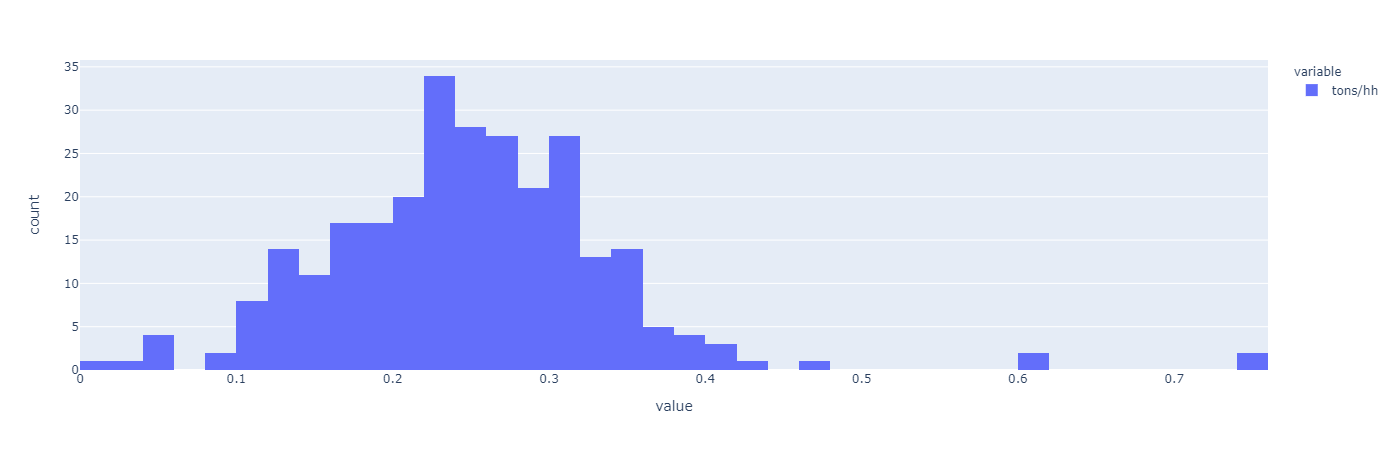

In [165]:
px.histogram(recycle19['tons/hh'])

The mean tons of recycling collected per household was 0.25. Min tons is 0.078, max is 0.759. Quite a range. Afterlooking at the histogram, it seems that the IQR is most representative of the distribution. It looks like there are 5 outliter above 0.46 tons/hh. I'll confirm through a boxplot.

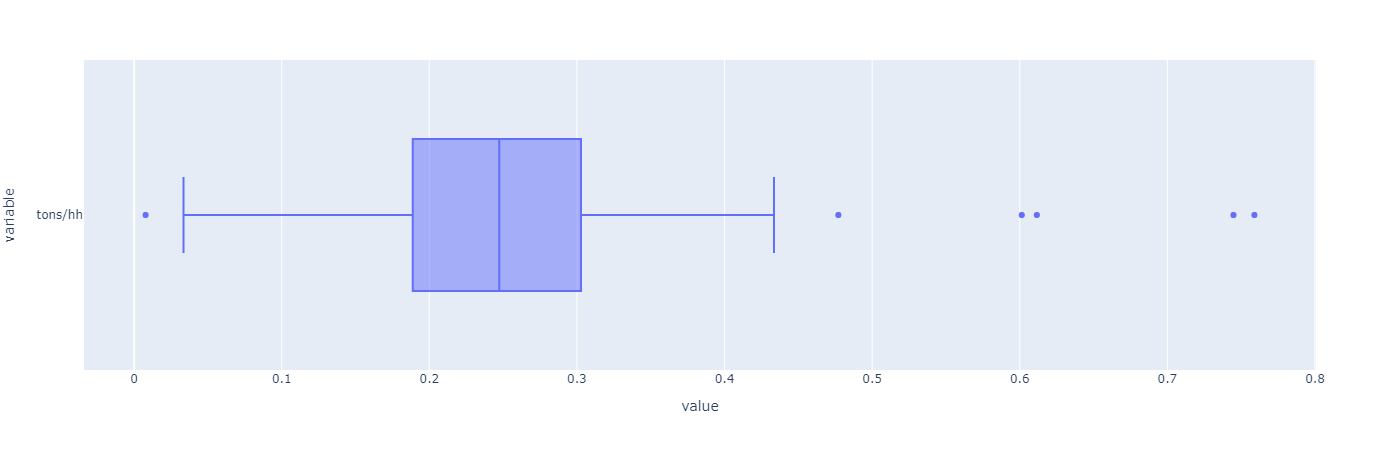

In [166]:
px.box(recycle19['tons/hh'], orientation='h')

Yeah, 5 outliers. These outliers may be of particular interest. Why are they so much higher than the rest of the population? How do these municipalities faire with trash collection; will their trash tonnages also be higher? Or perhaps their trash tonnages are perportionally lower? I'll record these outlier municipalities.

In [167]:
recycle19_outliers = recycle19[recycle19['tons/hh'] > 0.46]
recycle19_outliers

,Households Served by Municipal Recycling Program,Tons Single Stream Recyclables,Newspaper,Cardboard,Mixed Paper,Commingled,tons_total,tons/hh
Municipality Name,,,,,,,,
Bourne,8135.0,5646.89,0.0,412.0,0.00,0.0,6058.89,0.744793
Concord,3800.0,0.00,0.0,1307.0,965.82,611.3,2884.12,0.758979
Devens,145.0,0.00,0.0,0.0,44.00,43.2,87.20,0.601379
Needham,5349.0,232.00,0.0,422.0,1172.00,726.0,2552.00,0.477099
Provincetown,2348.0,1244.00,0.0,192.0,0.00,0.0,1436.00,0.611584


It's strange that 3 of these municipalities have SS values recorded in addition to separated materials like cardboard. Needham even has a mix of SS and Commingled streams... I wonder how common that is.

Devens is very small, so I wonder how useful it is to look at their data. 

In [168]:
ss_plus_recycle19 = recycle19[(recycle19['Tons Single Stream Recyclables'] > 0) & (recycle19.loc[:,'Newspaper':'Commingled'].sum(axis=1) > 0)]
ss_plus_recycle19.describe()

,Households Served by Municipal Recycling Program,Tons Single Stream Recyclables,Newspaper,Cardboard,Mixed Paper,Commingled,tons_total,tons/hh
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,8926.422222,2197.342222,10.096444,164.244444,49.180222,44.455778,2465.319111,0.280873
std,9803.471647,2403.916565,28.874841,453.703105,176.530217,117.565176,2546.254116,0.121731
min,939.000000,2.500000,0.000000,0.000000,0.000000,0.000000,124.230000,0.089544
25%,2687.000000,394.000000,0.000000,7.000000,0.000000,0.000000,663.600000,0.211984
50%,5349.000000,1289.000000,0.000000,45.000000,0.000000,2.960000,1436.000000,0.274047
75%,9810.000000,3028.000000,0.000000,161.000000,27.130000,30.400000,3113.000000,0.333962
max,44700.000000,9274.920000,136.020000,3000.000000,1172.000000,726.000000,9517.920000,0.744793


So 45/277 municipalities have both single stream and separate stream data. This group's mean tons/hh is 0.281 which is slightly higher than the total population (0.250). I wonder how purly multi-stream and purly single-stream municipalities compare.

In [169]:
ms_recycle19 = recycle19[(recycle19['Tons Single Stream Recyclables'] == 0) & (recycle19.loc[:,'Newspaper':'Commingled'].sum(axis=1) > 0)]
ss_recycle19 = recycle19[(recycle19['Tons Single Stream Recyclables'] > 0) & (recycle19.loc[:,'Newspaper':'Commingled'].sum(axis=1) == 0)]

In [172]:
print(ms_recycle19.shape, ss_recycle19.shape)

(127, 8) (105, 8)


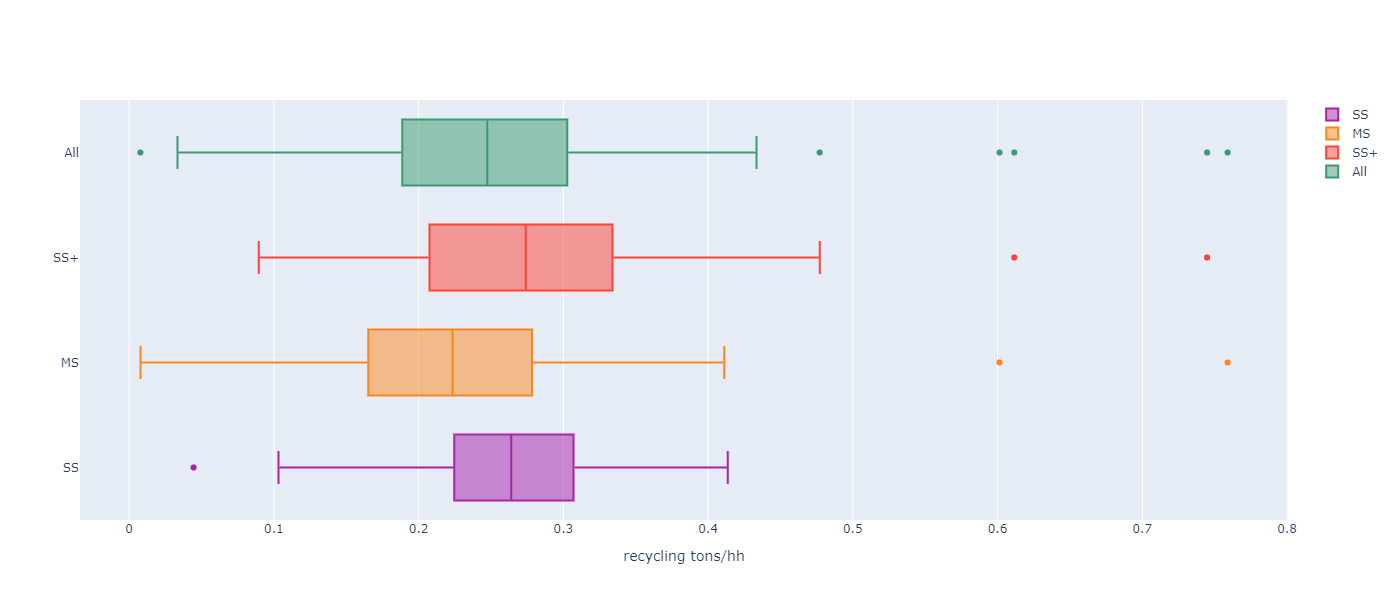

In [170]:
import plotly.graph_objects as go
from plotly.graph_objs import *

layout = Layout(
    boxgap=0.1,
    height = 600
)
fig = go.Figure(layout=layout)
fig.add_trace(go.Box(
    x=ss_recycle19['tons/hh'],
    name='SS',
    marker_color='#AA22AA'
))
fig.add_trace(go.Box(
    x=ms_recycle19['tons/hh'],
    name='MS',
    marker_color='#FF851B'
))
fig.add_trace(go.Box(
    x=ss_plus_recycle19['tons/hh'],
    name='SS+',
    marker_color='#FF4136'
))
fig.add_trace(go.Box(
    x=recycle19['tons/hh'],
    name='All',
    marker_color='#3D9970'
))

fig.update_layout(
    xaxis=dict(title='recycling tons/hh', zeroline=False),
    boxmode='overlay'
)

fig.update_traces(orientation='h') # horizontal box plots

fig.show()

So the single stream and single stream + (with some separate recycables) appear to have higher quantities of recycables per household than the total population, with ss+ being slightly higher than them all. Multistream-only has lower rates of recycling.

### Factoring in trash tonnage data...

In [189]:
trash19 = muServ19.loc[:,trash_tonnage_data]
trash19

,Households Served by Municipal Trash Program,Trash Disposal Tonnage,Bulky waste tonnage
Municipality Name,,,
Abington,4486.0,3826.66,NaN
Acton,3846.0,2148.67,NaN
Acushnet,3591.0,3405.38,41.00
Adams,664.0,130.04,4.43
Agawam,8879.0,6442.00,275.17
...,...,...,...
Woburn,11240.0,13368.65,NaN
Worcester,53000.0,21899.33,0.00
Worthington,362.0,181.94,80.55


In [190]:
trash19.fillna(value=0, inplace=True)

In [191]:
trash19

,Households Served by Municipal Trash Program,Trash Disposal Tonnage,Bulky waste tonnage
Municipality Name,,,
Abington,4486.0,3826.66,0.00
Acton,3846.0,2148.67,0.00
Acushnet,3591.0,3405.38,41.00
Adams,664.0,130.04,4.43
Agawam,8879.0,6442.00,275.17
...,...,...,...
Woburn,11240.0,13368.65,0.00
Worcester,53000.0,21899.33,0.00
Worthington,362.0,181.94,80.55


In [192]:
trash19['tons_total'] = trash19.loc[:,'Trash Disposal Tonnage':'Bulky waste tonnage'].sum(axis=1)
trash19.head()

,Households Served by Municipal Trash Program,Trash Disposal Tonnage,Bulky waste tonnage,tons_total
Municipality Name,,,,
Abington,4486.0,3826.66,0.00,3826.66
Acton,3846.0,2148.67,0.00,2148.67
Acushnet,3591.0,3405.38,41.00,3446.38
Adams,664.0,130.04,4.43,134.47
Agawam,8879.0,6442.00,275.17,6717.17


In [193]:
trash19['tons/hh'] = trash19['tons_total'] / trash19['Households Served by Municipal Trash Program']
trash19.head()

,Households Served by Municipal Trash Program,Trash Disposal Tonnage,Bulky waste tonnage,tons_total,tons/hh
Municipality Name,,,,,
Abington,4486.0,3826.66,0.00,3826.66,0.853023
Acton,3846.0,2148.67,0.00,2148.67,0.558677
Acushnet,3591.0,3405.38,41.00,3446.38,0.959727
Adams,664.0,130.04,4.43,134.47,0.202515
Agawam,8879.0,6442.00,275.17,6717.17,0.756523


In [194]:
trash19.describe()

,Households Served by Municipal Trash Program,Trash Disposal Tonnage,Bulky waste tonnage,tons_total,tons/hh
count,277.000000,277.000000,277.000000,277.000000,274.000000
mean,6717.931408,5144.469964,78.264404,5222.734368,inf
std,17003.364009,12625.504709,276.130182,12639.313586,NaN
min,0.000000,0.000000,0.000000,0.000000,0.124967
25%,885.000000,496.060000,0.000000,575.880000,0.548730
50%,3309.000000,2149.680000,0.000000,2182.650000,0.710989
75%,7856.000000,5926.880000,29.100000,6195.800000,0.860657
max,260000.000000,188113.000000,2501.000000,188113.000000,inf


In [198]:
trash19.sort_values(by='tons/hh')

,Households Served by Municipal Trash Program,Trash Disposal Tonnage,Bulky waste tonnage,tons_total,tons/hh
Municipality Name,,,,,
Blandford,300.0,37.49,0.00,37.49,0.124967
Hampden,600.0,100.50,0.00,100.50,0.167500
Adams,664.0,130.04,4.43,134.47,0.202515
Mount Washington,146.0,25.11,6.04,31.15,0.213356
Sturbridge,1882.0,420.00,0.00,420.00,0.223167
...,...,...,...,...,...
Lanesborough,0.0,0.00,2.33,2.33,inf
Westminster,0.0,2566.00,0.00,2566.00,inf
Leicester,0.0,0.00,0.00,0.00,NaN


In [205]:
trash19[(trash19['Households Served by Municipal Trash Program'] == 0) & (trash19['tons_total'] > 0)]

,Households Served by Municipal Trash Program,Trash Disposal Tonnage,Bulky waste tonnage,tons_total,tons/hh
Municipality Name,,,,,
Devens,0.0,79.66,0.00,79.66,inf
Lanesborough,0.0,0.00,2.33,2.33,inf
Westminster,0.0,2566.00,0.00,2566.00,inf


I don't want to remove these three municipalities from the total dataset because they do include recycling data which I am ultimately interested in. However, I will manually remove them from the trash19 dataframe. Actually, I'm going to remove any that are not serving any households.

In [206]:
trash19 = trash19[trash19['Households Served by Municipal Trash Program'] != 0]

In [207]:
trash19.describe()

,Households Served by Municipal Trash Program,Trash Disposal Tonnage,Bulky waste tonnage,tons_total,tons/hh
count,271.000000,271.000000,271.000000,271.000000,271.000000
mean,6866.667897,5248.607085,79.988598,5328.595683,0.715124
std,17161.411511,12744.530842,278.934586,12757.857492,0.245459
min,73.000000,25.110000,0.000000,31.150000,0.124967
25%,985.500000,518.115000,0.000000,606.350000,0.547107
50%,3450.000000,2258.000000,0.000000,2258.000000,0.709091
75%,7997.500000,6061.520000,31.080000,6222.130000,0.856209
max,260000.000000,188113.000000,2501.000000,188113.000000,1.626437


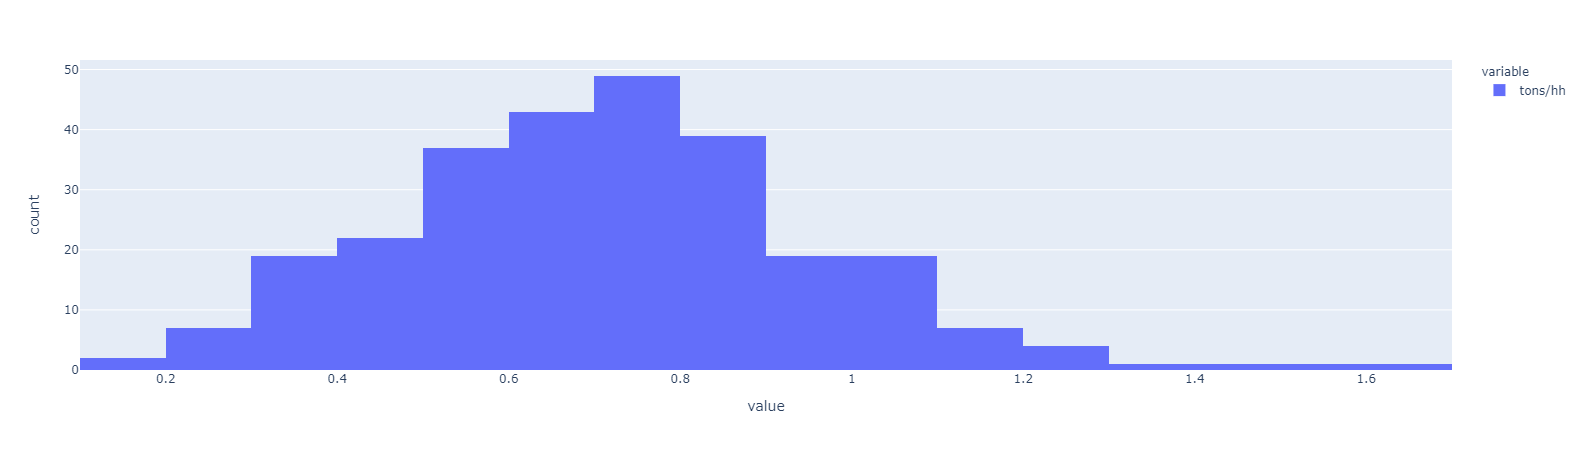

In [209]:
px.histogram(trash19['tons/hh'])

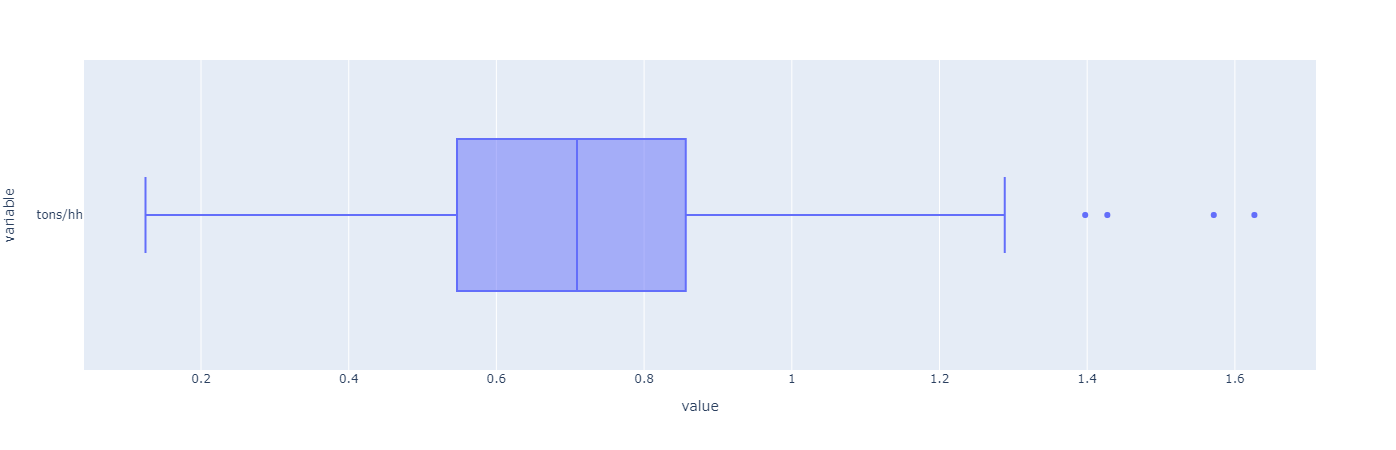

In [210]:
px.box(trash19['tons/hh'],orientation='h')

The average tonnage of trash per household is 0.715, the min is 0.125 and the max is 1.626. The IQR of 0.567-0.857 is wider than that of the recycling's IQR (0.189-0.303).

There's two things I could do to compare the trash tonnage to the recycling tonnage: **1)** I could make a column of the ratio of trash tonnage to recycling tonnage and **2)** I can make a box plot grouping similarly to what I did for the recycling-only EDA. I think I'll do both.

In [211]:
recycle19['recycle:trash_ratio_hh'] = recycle19['tons/hh'] / trash19['tons/hh']
recycle19.head()

,Households Served by Municipal Recycling Program,Tons Single Stream Recyclables,Newspaper,Cardboard,Mixed Paper,Commingled,tons_total,tons/hh,recycle:trash_ratio_hh
Municipality Name,,,,,,,,,
Abington,4486.0,1413.42,0.0,0.0,0.00,0.00,1413.42,0.315074,0.369361
Acton,4335.0,0.00,0.0,0.0,683.04,407.27,1090.31,0.251513,0.450195
Acushnet,3591.0,879.50,3.7,20.0,16.94,27.40,947.54,0.263865,0.274938
Adams,664.0,0.00,0.0,0.0,94.13,45.48,139.61,0.210256,1.038224
Agawam,8879.0,2238.00,0.0,0.0,0.00,0.00,2238.00,0.252055,0.333176


In [212]:
recycle19['recycle:trash_ratio_hh'].describe()

count    271.000000
mean       0.391683
std        0.208610
min        0.061090
25%        0.269808
50%        0.363858
75%        0.465475
max        2.185970
Name: recycle:trash_ratio_hh, dtype: float64

In [215]:
recycle19.loc[recycle19_outliers.index]

,Households Served by Municipal Recycling Program,Tons Single Stream Recyclables,Newspaper,Cardboard,Mixed Paper,Commingled,tons_total,tons/hh,recycle:trash_ratio_hh
Municipality Name,,,,,,,,,
Bourne,8135.0,5646.89,0.0,412.0,0.00,0.0,6058.89,0.744793,0.774470
Concord,3800.0,0.00,0.0,1307.0,965.82,611.3,2884.12,0.758979,1.045633
Devens,145.0,0.00,0.0,0.0,44.00,43.2,87.20,0.601379,NaN
Needham,5349.0,232.00,0.0,422.0,1172.00,726.0,2552.00,0.477099,0.561515
Provincetown,2348.0,1244.00,0.0,192.0,0.00,0.0,1436.00,0.611584,0.474711


Interesting, these recycling tonnage outliers definitelly all exceed the IQR for recycle:trash tonnage ratio, meaning they're not merely generating more waste per household. They are actually recycling more of their waste. I'd like to see if there are any additional outliers in the ratio data.

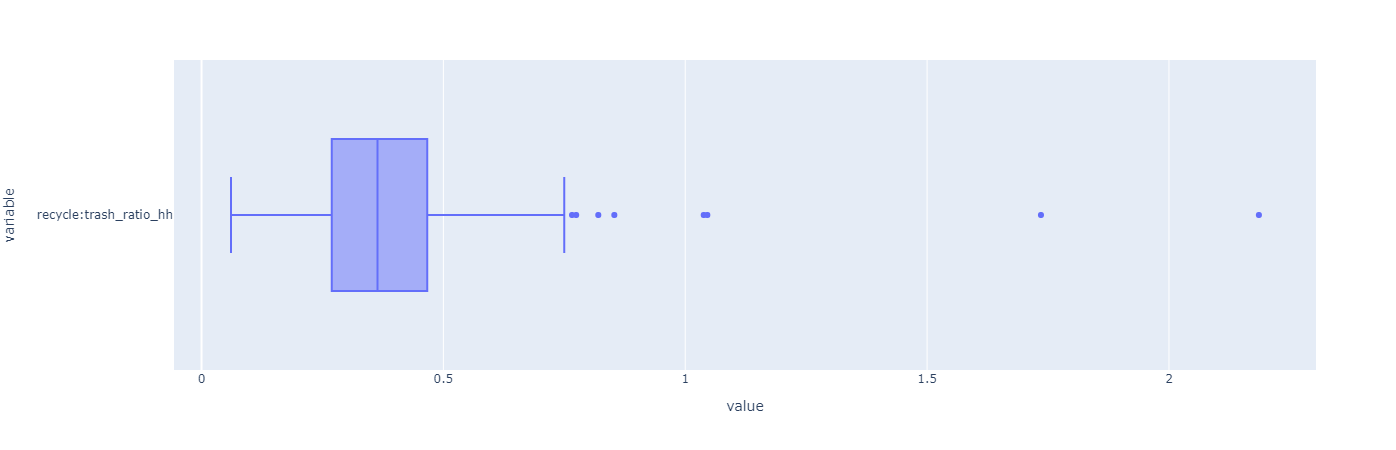

In [214]:
px.box(recycle19['recycle:trash_ratio_hh'], orientation='h')

In [217]:
recycle19[recycle19['recycle:trash_ratio_hh'] > 0.75].sort_values(by='recycle:trash_ratio_hh')

,Households Served by Municipal Recycling Program,Tons Single Stream Recyclables,Newspaper,Cardboard,Mixed Paper,Commingled,tons_total,tons/hh,recycle:trash_ratio_hh
Municipality Name,,,,,,,,,
Aquinnah,230.0,72.00,0.00,0.0,0.00,0.00,72.00,0.313043,0.765957
Bourne,8135.0,5646.89,0.00,412.0,0.00,0.00,6058.89,0.744793,0.774470
Dunstable,277.0,73.00,0.00,0.0,0.00,0.00,73.00,0.263538,0.820225
Northampton,2947.0,0.00,0.00,0.0,505.11,301.18,806.29,0.273597,0.853370
Adams,664.0,0.00,0.00,0.0,94.13,45.48,139.61,0.210256,1.038224
Concord,3800.0,0.00,0.00,1307.0,965.82,611.30,2884.12,0.758979,1.045633
Blandford,300.0,0.00,5.46,29.0,5.71,24.89,65.06,0.216867,1.735396
Hampden,600.0,0.00,0.00,0.0,126.68,93.01,219.69,0.366150,2.185970


Now I'm interest to know which municipalities generate the most total waste. It is impressive that municipalities like Concord recycle more waste than they do throwing out. However, they also seem to be generating more tons of recycling than other outliers, which means they're probably on the higher end of how much total waste they're generating.

In [218]:
recycle19['total_tons_waste/hh'] = recycle19['tons/hh'] + trash19['tons/hh']

In [220]:
recycle19.sort_values(by='total_tons_waste/hh', ascending=False).head(10)

,Households Served by Municipal Recycling Program,Tons Single Stream Recyclables,Newspaper,Cardboard,Mixed Paper,Commingled,tons_total,tons/hh,recycle:trash_ratio_hh,total_tons_waste/hh
Municipality Name,,,,,,,,,,
Chatham,3160.0,287.97,68.95,261.0,188.02,280.64,1086.58,0.343854,0.211416,1.970291
Provincetown,2348.0,1244.00,0.00,192.0,0.00,0.00,1436.00,0.611584,0.474711,1.899915
Edgartown,1750.0,525.00,0.00,0.0,0.00,0.00,525.00,0.300000,0.190909,1.871429
Bourne,8135.0,5646.89,0.00,412.0,0.00,0.00,6058.89,0.744793,0.774470,1.706473
Avon,1445.0,532.49,0.00,0.0,0.00,0.00,532.49,0.368505,0.288383,1.646339
Nantucket,8871.0,0.00,0.00,1116.0,0.00,2021.25,3137.25,0.353652,0.275252,1.638483
Lawrence,21723.0,3318.05,0.00,161.0,0.00,0.00,3479.05,0.160155,0.112210,1.587435
Florida,211.0,0.00,0.00,0.0,19.10,15.18,34.28,0.162464,0.116270,1.559763
Carlisle,1600.0,0.00,0.00,183.0,201.15,189.92,574.07,0.358794,0.318312,1.485969


In [221]:
recycle19.sort_values(by='total_tons_waste/hh', ascending=False).tail(10)

,Households Served by Municipal Recycling Program,Tons Single Stream Recyclables,Newspaper,Cardboard,Mixed Paper,Commingled,tons_total,tons/hh,recycle:trash_ratio_hh,total_tons_waste/hh
Municipality Name,,,,,,,,,,
Becket,1779.0,0.00,0.00,0.0,52.85,52.40,105.25,0.059162,0.201787,0.352355
Mount Washington,146.0,0.00,0.00,0.0,10.54,9.49,20.03,0.137192,0.643018,0.350548
Blandford,300.0,0.00,5.46,29.0,5.71,24.89,65.06,0.216867,1.735396,0.341833
Halifax,3184.0,290.72,0.00,45.0,0.00,0.00,335.72,0.105440,0.462007,0.333660
Devens,145.0,0.00,0.00,0.0,44.00,43.20,87.20,0.601379,NaN,NaN
Lanesborough,1322.0,0.00,0.00,0.0,45.38,22.29,67.67,0.051188,NaN,NaN
Leicester,3587.0,0.00,0.00,0.0,69.00,51.00,120.00,0.033454,NaN,NaN
New Ashford,51.0,0.00,0.00,0.0,4.01,3.94,7.95,0.155882,NaN,NaN
Wareham,12274.0,0.00,0.00,37.0,25.90,32.70,95.60,0.007789,NaN,NaN


So...Bourne and Concord are two of the top 10 produces of waste in general. So although their recycle rate are high, they also are producing more waste total. This in interesting when compairing to a place like Becket or Halifax, two municipalities with a relatively high population to serve, they have low recycling tonnages per household but they also produce less waste total per household... you could almost make a different metric like:

(total_tons)/(recycle:trash) --> higher trash rates and high total tonnage would produce a higher "score" 

In [222]:
recycle19['score'] = recycle19['total_tons_waste/hh'] / recycle19['recycle:trash_ratio_hh']

In [227]:
recycle19.sort_values(by='score').head(20)

,Households Served by Municipal Recycling Program,Tons Single Stream Recyclables,Newspaper,Cardboard,Mixed Paper,Commingled,tons_total,tons/hh,recycle:trash_ratio_hh,total_tons_waste/hh,score
Municipality Name,,,,,,,,,,,
Blandford,300.0,0.00,5.46,29.0,5.71,24.89,65.06,0.216867,1.735396,0.341833,0.196977
Hampden,600.0,0.00,0.00,0.0,126.68,93.01,219.69,0.366150,2.185970,0.533650,0.244125
Adams,664.0,0.00,0.00,0.0,94.13,45.48,139.61,0.210256,1.038224,0.412771,0.397574
Sturbridge,1882.0,0.00,12.00,50.0,53.00,200.00,315.00,0.167375,0.750000,0.390542,0.520723
Mount Washington,146.0,0.00,0.00,0.0,10.54,9.49,20.03,0.137192,0.643018,0.350548,0.545161
Northampton,2947.0,0.00,0.00,0.0,505.11,301.18,806.29,0.273597,0.853370,0.594204,0.696303
Dunstable,277.0,73.00,0.00,0.0,0.00,0.00,73.00,0.263538,0.820225,0.584838,0.713021
Halifax,3184.0,290.72,0.00,45.0,0.00,0.00,335.72,0.105440,0.462007,0.333660,0.722197
Oak Bluffs,2005.0,0.00,75.00,68.0,0.00,122.00,265.00,0.132170,0.510261,0.391193,0.766652


In [228]:
recycle19.sort_values(by='score').tail(20)

,Households Served by Municipal Recycling Program,Tons Single Stream Recyclables,Newspaper,Cardboard,Mixed Paper,Commingled,tons_total,tons/hh,recycle:trash_ratio_hh,total_tons_waste/hh,score
Municipality Name,,,,,,,,,,,
Peabody,14000.0,0.00,0.00,0.0,1818.11,1499.81,3317.92,0.236994,0.199778,1.423280,7.124293
West Bridgewater,1823.0,339.62,0.00,0.0,0.00,0.00,339.62,0.186297,0.171957,1.269693,7.383786
Yarmouth,10143.0,0.00,156.00,369.0,204.00,460.00,1189.00,0.117224,0.131216,1.010588,7.701715
Pittsfield,17522.0,0.00,0.00,0.0,1176.63,743.20,1919.83,0.109567,0.125898,0.979850,7.782892
Quincy,45000.0,4646.93,0.00,0.0,0.00,0.00,4646.93,0.103265,0.115846,0.994668,8.586154
Woburn,11240.0,2071.74,0.00,0.0,0.00,0.00,2071.74,0.184319,0.154970,1.373700,8.864296
Paxton,1578.0,2.50,0.00,0.0,1.80,137.00,141.30,0.089544,0.105605,0.937452,8.876938
Chatham,3160.0,287.97,68.95,261.0,188.02,280.64,1086.58,0.343854,0.211416,1.970291,9.319507
Methuen,14754.0,2541.14,0.00,0.0,0.00,0.00,2541.14,0.172234,0.143033,1.376387,9.622850


at brief glance, it appears that municipalities with higher burden "scores" also have higher populations while municipalities with lower burden scors have lower populations generally. I am interested in the municipalities with higher populations but lower burden scores like: Sturbridge, Northhampton, Halifax. I could compare things to other higher populated municipalities with high burden scores like: Lawrence, North Adams, and Edgartown.

In [229]:
ss_plus_trash19 = trash19[(recycle19['Tons Single Stream Recyclables'] > 0) & (recycle19.loc[:,'Newspaper':'Commingled'].sum(axis=1) > 0)]
ms_trash19 = trash19[(recycle19['Tons Single Stream Recyclables'] == 0) & (recycle19.loc[:,'Newspaper':'Commingled'].sum(axis=1) > 0)]
ss_trash19 = trash19[(recycle19['Tons Single Stream Recyclables'] > 0) & (recycle19.loc[:,'Newspaper':'Commingled'].sum(axis=1) == 0)]

<ipython-input-229-bf5af30ab61a>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-229-bf5af30ab61a>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-229-bf5af30ab61a>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



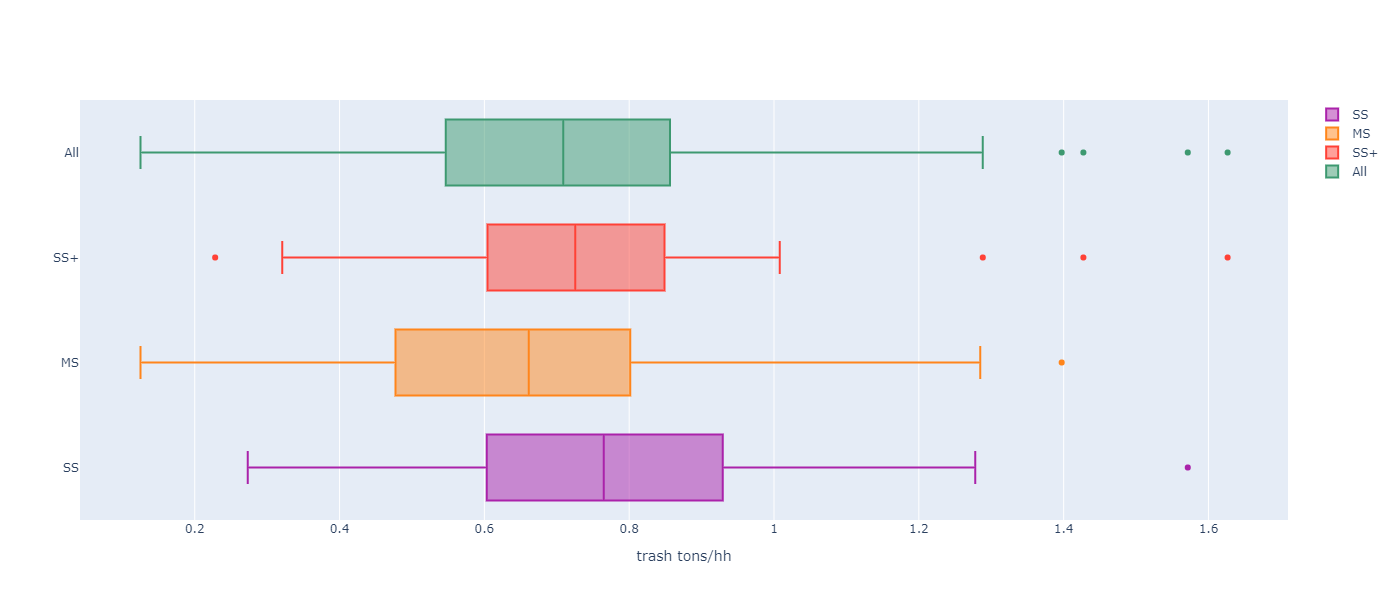

In [236]:
layout = Layout(
    boxgap=0.1,
    height = 600
)
fig = go.Figure(layout=layout)
fig.add_trace(go.Box(
    x=ss_trash19['tons/hh'],
    name='SS',
    marker_color='#AA22AA'
))
fig.add_trace(go.Box(
    x=ms_trash19['tons/hh'],
    name='MS',
    marker_color='#FF851B'
))
fig.add_trace(go.Box(
    x=ss_plus_trash19['tons/hh'],
    name='SS+',
    marker_color='#FF4136'
))
fig.add_trace(go.Box(
    x=trash19['tons/hh'],
    name='All',
    marker_color='#3D9970'
))
# fig.add_trace(go.Box(
#     x=ss_recycle19['tons/hh'],
#     name='SS',
#     marker_color='#AA22AA'
# ))
# fig.add_trace(go.Box(
#     x=ms_recycle19['tons/hh'],
#     name='MS',
#     marker_color='#FF851B'
# ))
# fig.add_trace(go.Box(
#     x=ss_plus_recycle19['tons/hh'],
#     name='SS+',
#     marker_color='#FF4136'
# ))
# fig.add_trace(go.Box(
#     x=recycle19['tons/hh'],
#     name='All',
#     marker_color='#3D9970'
# ))

fig.update_layout(
    xaxis=dict(title='trash tons/hh', zeroline=False),
    boxmode='overlay' #or group
)

fig.update_traces(orientation='h') # horizontal box plots

fig.show()

This is suggesting that muncipalities with single stream also generate more trash, in addition to recycling...

In [237]:
ss_plus_total19 = recycle19[(recycle19['Tons Single Stream Recyclables'] > 0) & (recycle19.loc[:,'Newspaper':'Commingled'].sum(axis=1) > 0)]
ms_total19 = recycle19[(recycle19['Tons Single Stream Recyclables'] == 0) & (recycle19.loc[:,'Newspaper':'Commingled'].sum(axis=1) > 0)]
ss_total19 = recycle19[(recycle19['Tons Single Stream Recyclables'] > 0) & (recycle19.loc[:,'Newspaper':'Commingled'].sum(axis=1) == 0)]

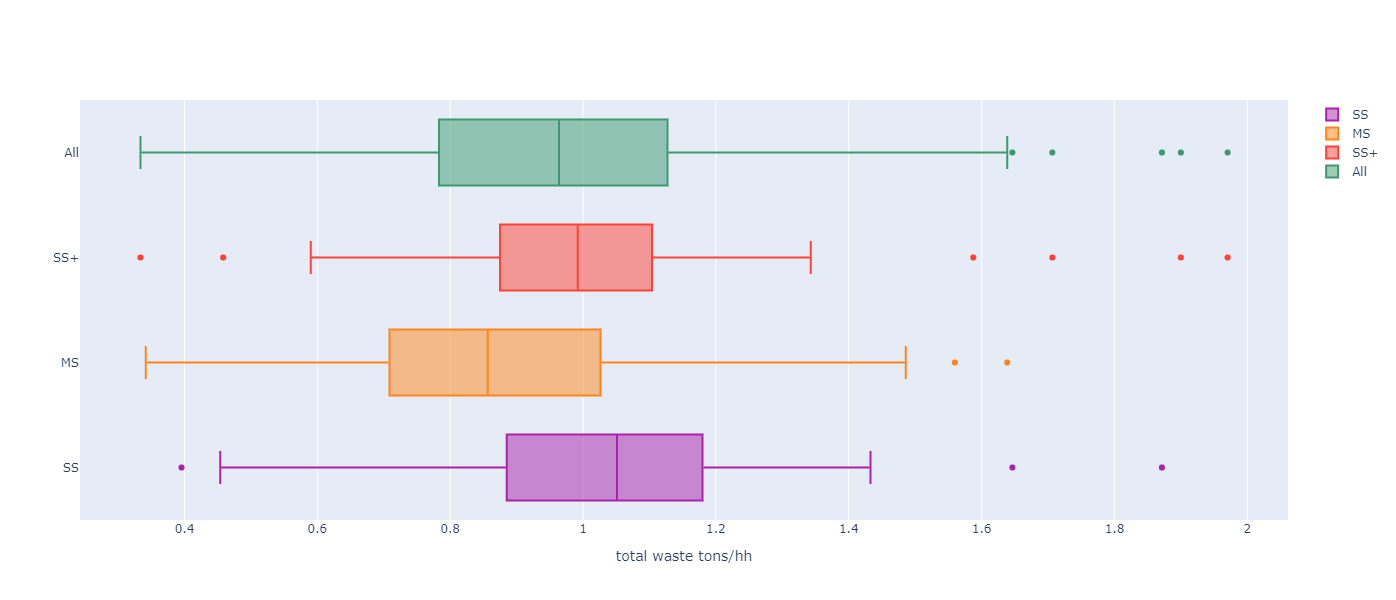

In [240]:
layout = Layout(
    boxgap=0.1,
    height = 600
)
fig = go.Figure(layout=layout)
fig.add_trace(go.Box(
    x=ss_total19['total_tons_waste/hh'],
    name='SS',
    marker_color='#AA22AA'
))
fig.add_trace(go.Box(
    x=ms_total19['total_tons_waste/hh'],
    name='MS',
    marker_color='#FF851B'
))
fig.add_trace(go.Box(
    x=ss_plus_total19['total_tons_waste/hh'],
    name='SS+',
    marker_color='#FF4136'
))
fig.add_trace(go.Box(
    x=recycle19['total_tons_waste/hh'],
    name='All',
    marker_color='#3D9970'
))

fig.update_layout(
    xaxis=dict(title='total waste tons/hh', zeroline=False),
    boxmode='overlay' #or group
)

fig.update_traces(orientation='h') # horizontal box plots

fig.show()

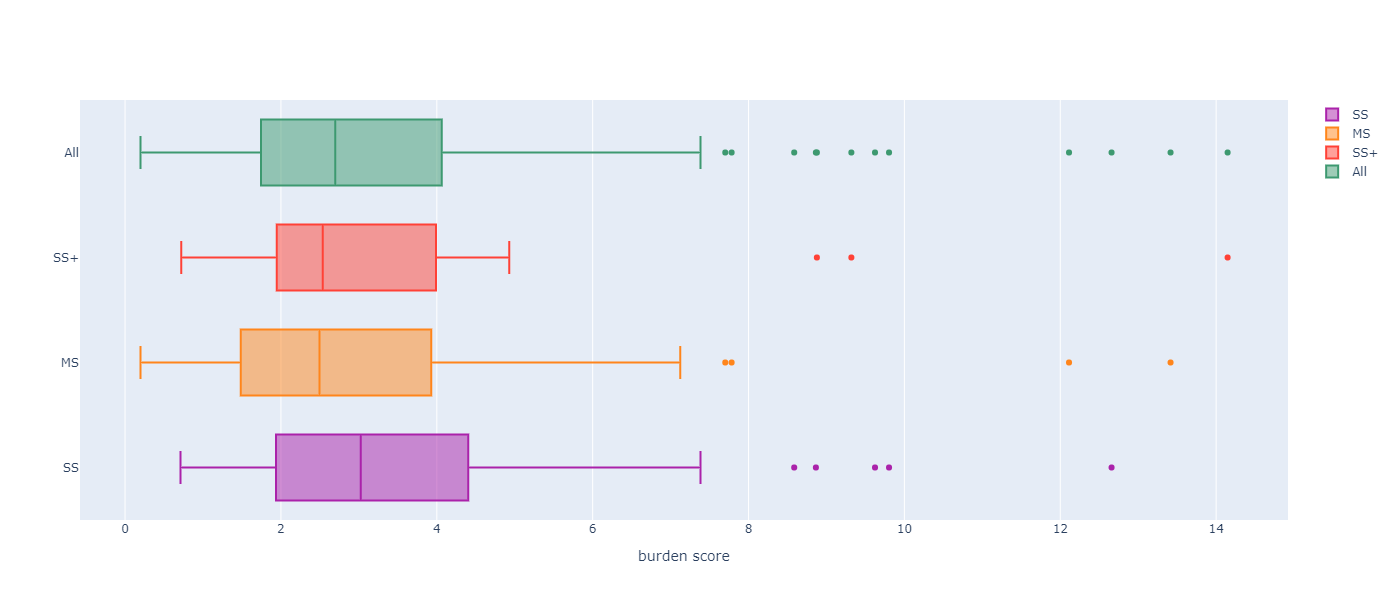

In [239]:
layout = Layout(
    boxgap=0.1,
    height = 600
)
fig = go.Figure(layout=layout)
fig.add_trace(go.Box(
    x=ss_total19['score'],
    name='SS',
    marker_color='#AA22AA'
))
fig.add_trace(go.Box(
    x=ms_total19['score'],
    name='MS',
    marker_color='#FF851B'
))
fig.add_trace(go.Box(
    x=ss_plus_total19['score'],
    name='SS+',
    marker_color='#FF4136'
))
fig.add_trace(go.Box(
    x=recycle19['score'],
    name='All',
    marker_color='#3D9970'
))

fig.update_layout(
    xaxis=dict(title='burden score', zeroline=False),
    boxmode='overlay' #or group
)

fig.update_traces(orientation='h') # horizontal box plots

fig.show()

So I'm definitely a little confused at this point. the scores doesn't seem to trend with the rest of the data. But it does seem like the burden score is higher for single stream municipalities and is lower for the Multi-stream and single stream +.

Next steps would be:
* looking at other attributes in the municipality survey that contributes to (decide if you're going to look at recycle ratio or "burden" score), like:
  * Population size
  * recycle service correlations
  * trash service correlations
* Historical data of municipality survey (will need some level of automation)
* Find way to classify different municipalities (by attributes like political leaning, population size, most common type of housing and other demographics). See if success rates are influence by different factors in these different classification demographics.